In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train= pd.read_csv(r"C:\Users\TOSHIBA\Documents\Practice\Project to be updated on CV\Health Insurance cost prediction\train.csv")

In [3]:
df_train.shape

(381109, 12)

In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
# Checking Missing Value
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df_train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

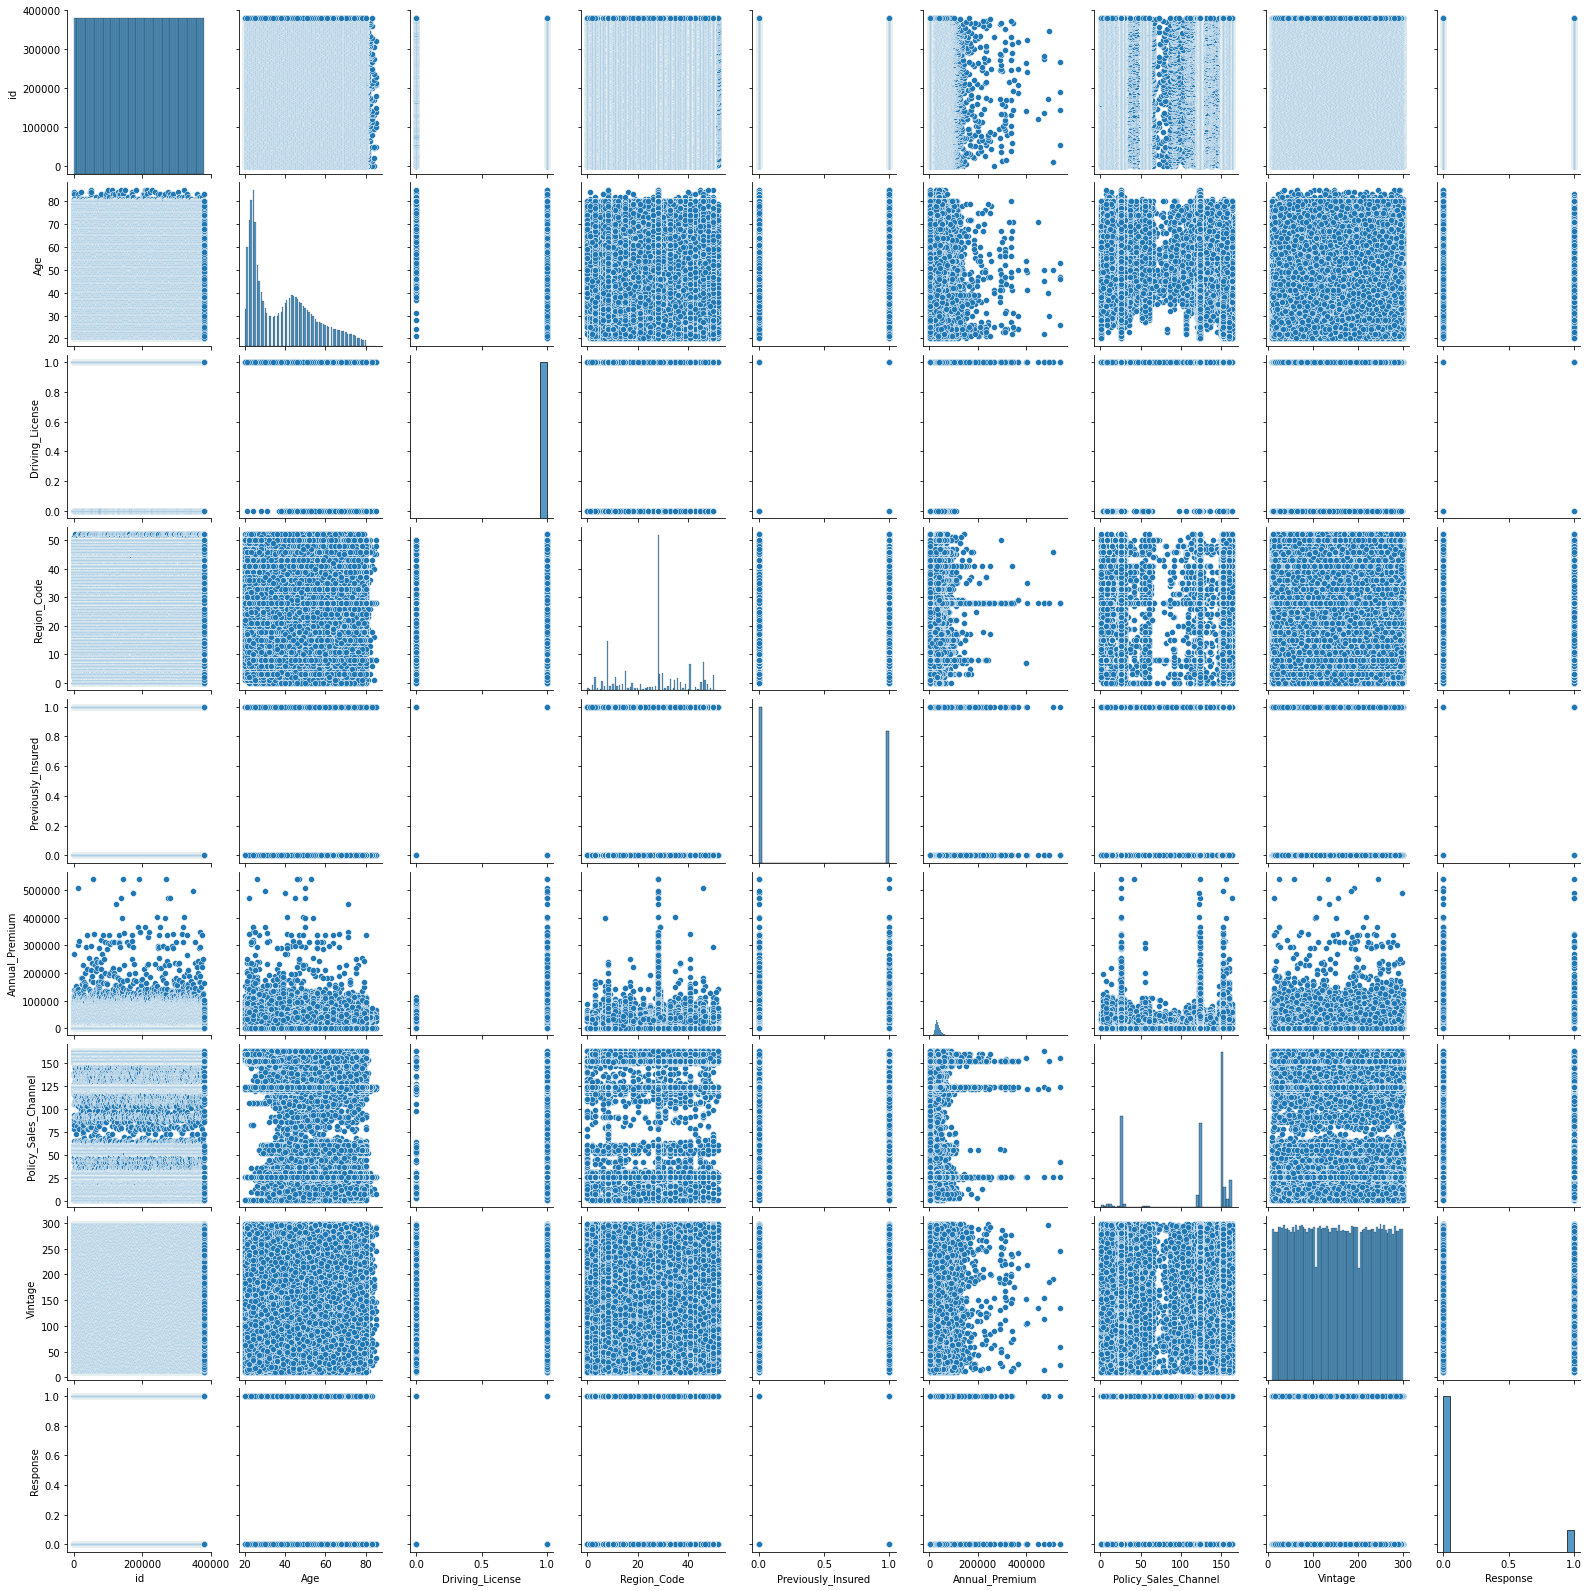

In [11]:
sns.pairplot(df_train)

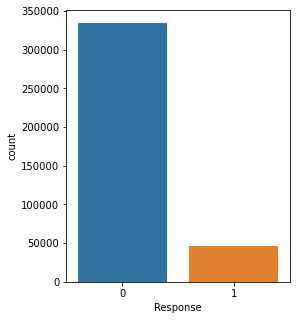

In [12]:
plt.figure(figsize=(4,5))
sns.countplot(x="Response",data= df_train)
plt.show()

Text(0.5, 1.0, 'Driving_License')

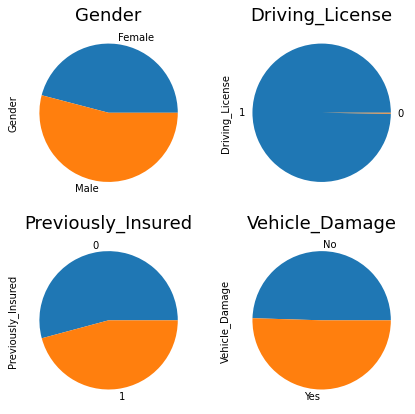

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(7,7))

df_train['Gender'].value_counts().sort_index().plot.pie(ax=axs[0][0])
axs[0][0].set_title("Gender", fontsize=18)

df_train['Previously_Insured'].value_counts().sort_index().plot.pie(ax=axs[1][0])
axs[1][0].set_title("Previously_Insured", fontsize=18)

df_train['Vehicle_Damage'].value_counts().sort_index().plot.pie(ax=axs[1][1])
axs[1][1].set_title("Vehicle_Damage", fontsize=18)

df_train['Driving_License'].value_counts().head().plot.pie(ax=axs[0][1])
axs[0][1].set_title("Driving_License", fontsize=18)

In [16]:
# plt.figure(figsize=(10,10))
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].pie(df['Gender'].value_counts())
# axs[0, 0].set_title('Gender')
# axs[0, 0].pie(df['Previously_Insured'])
# axs[0, 1].set_title('Previously_Insured')
# axs[0, 0].pie(df["Vehicle_Damage"])
# axs[1, 0].set_title("Vehicle_Damage")
# axs[0, 0].pie(df['Driving_License'])
# axs[1, 1].set_title('Driving_License')

Text(0.5, 1.0, 'Vehicle Damage by Gender')

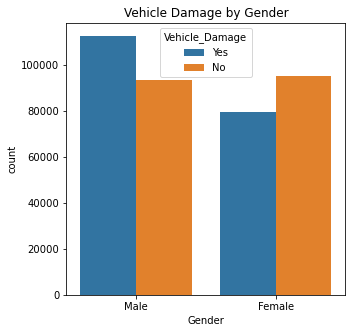

In [16]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", hue="Vehicle_Damage", data=df_train)
plt.title("Vehicle Damage by Gender")

<AxesSubplot:xlabel='Age', ylabel='count'>

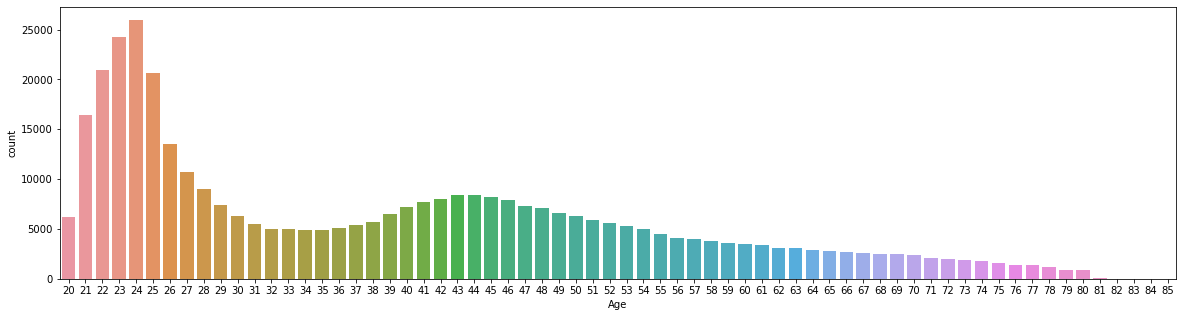

In [17]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x="Age",data=df_train)

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [19]:
df_train["Gender"]=le.fit_transform(df_train["Gender"])

In [20]:
df_train["Vehicle_Damage"]=le.fit_transform(df_train["Vehicle_Damage"])

In [36]:
# 'Vehicle_Age'
# df_train['Vehicle_Age']=le.fit_transform(df_train['Vehicle_Age'])

In [21]:
df_train['Vehicle_Age'].replace(to_replace={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2},
             inplace=True)

In [22]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


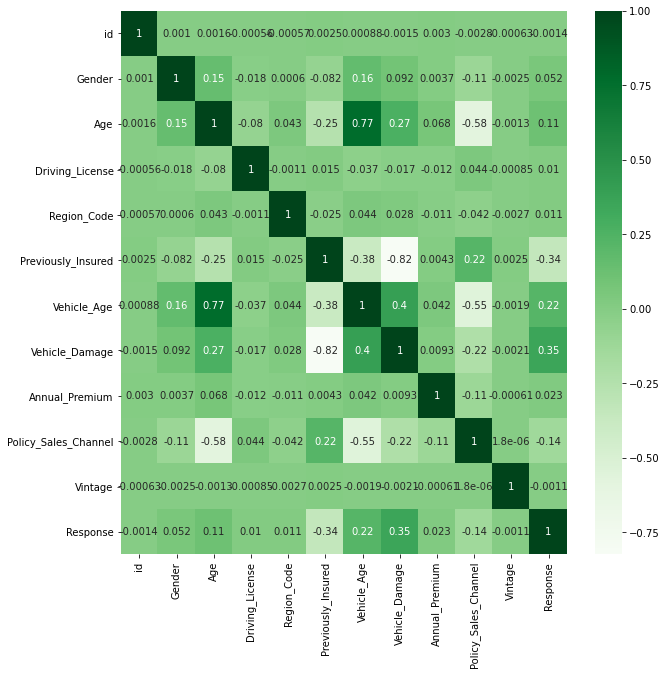

In [23]:
plt.figure(figsize=(10,10))
cor=df_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

In [24]:
df_train.describe(include="all")

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [25]:
df_train=df_train.drop(columns=['id'])

In [26]:
num_data= df_train.select_dtypes(include=np.number)
num_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [ ]:
# for i in num_data:
#     plt.figure(figsize=(5,6))
#     sns.boxplot(num_data[i], y= df_train["Response"])

In [27]:
y=df_train.Response
X=df_train .drop(columns=['Response'])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score 
print(classification_report(y_test, dt_predict))
dt_accuracy = accuracy_score(y_test, dt_predict)
print("Accuracy of decision tree" + ' : ' + str(dt_accuracy))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100195
           1       0.29      0.30      0.30     14138

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.82    114333

Accuracy of decision tree : 0.8222647879439882


In [32]:
from sklearn.model_selection import cross_val_score 
cv_scores = cross_val_score(dt,X,y,cv=10)
print(cv_scores)
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.82396159 0.82131143 0.82320065 0.8234368  0.82099656 0.82467004
 0.82446013 0.82548346 0.8255097  0.82364209]
Average 10-Fold CV Score: 0.8236672447379725


In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,50,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)
np.abs(grid_tree.best_score_)
#test the accuracy of all the combination of the parameters, then output the highest parameter.
print(grid_tree.best_estimator_)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=50)


In [36]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 50,
 'min_samples_split': 2}

In [37]:
Tree = DecisionTreeClassifier(criterion='gini',
                       max_depth=9, max_leaf_nodes=50,
                       min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2)
Tree.fit(X_train, y_train)
predictions = Tree.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.876203720710556

In [40]:
print(roc_auc_score(y_test,predictions))

0.5010440459465904


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict=rfc.predict(X_test)

In [42]:
print(classification_report(y_test, rfc_predict))
rfc_accuracy = accuracy_score(y_test, rfc_predict)
print("Accuracy of decision tree" + ' : ' + str(rfc_accuracy))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    100195
           1       0.37      0.12      0.18     14138

    accuracy                           0.87    114333
   macro avg       0.63      0.54      0.55    114333
weighted avg       0.82      0.87      0.83    114333

Accuracy of decision tree : 0.8663028172093796


## MLP(ANN)

In [46]:
import tensorflow as tf
from tensorflow import keras

In [49]:
from sklearn.preprocessing import scale
X_sc=scale(X)

In [50]:
tf.random.set_seed(0)
nn_model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid')])
nn_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
history = nn_model.fit(X_sc, y, epochs = 15, validation_split=.1, batch_size=100)

Epoch 1/15
3430/3430 [==============================] - 11s 3ms/step - loss: 0.3388 - acc: 0.8565 - val_loss: 0.2849 - val_acc: 0.8807
Epoch 2/15
3430/3430 [==============================] - 10s 3ms/step - loss: 0.2842 - acc: 0.8768 - val_loss: 0.2784 - val_acc: 0.8808
Epoch 3/15
3430/3430 [==============================] - 11s 3ms/step - loss: 0.2807 - acc: 0.8768 - val_loss: 0.2764 - val_acc: 0.8807
Epoch 4/15
3430/3430 [==============================] - 9s 3ms/step - loss: 0.2794 - acc: 0.8768 - val_loss: 0.2755 - val_acc: 0.8808
Epoch 5/15
3430/3430 [==============================] - 12s 3ms/step - loss: 0.2787 - acc: 0.8768 - val_loss: 0.2751 - val_acc: 0.8808
Epoch 6/15
3430/3430 [==============================] - 11s 3ms/step - loss: 0.2783 - acc: 0.8768 - val_loss: 0.2748 - val_acc: 0.8809
Epoch 7/15
3430/3430 [==============================] - 10s 3ms/step - loss: 0.2780 - acc: 0.8768 - val_loss: 0.2745 - val_acc: 0.8809
Epoch 8/15
3430/3430 [==============================] - 

In [61]:
tf.random.set_seed(0)
nn_model = tf.keras.Sequential([tf.keras.layers.Dense(5, activation='relu'), 
                                tf.keras.layers.Dense(10, activation='tanh'), 
                                tf.keras.layers.Dense(1, activation='sigmoid')])
nn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
history = nn_model.fit(X_sc, y, epochs = 5, validation_split=.1, batch_size=100)

Epoch 1/5
3430/3430 [==============================] - 10s 3ms/step - loss: 0.2833 - acc: 0.8771 - val_loss: 0.2693 - val_acc: 0.8809
Epoch 2/5
3430/3430 [==============================] - 11s 3ms/step - loss: 0.2711 - acc: 0.8771 - val_loss: 0.2680 - val_acc: 0.8809
Epoch 3/5
3430/3430 [==============================] - 12s 3ms/step - loss: 0.2705 - acc: 0.8771 - val_loss: 0.2678 - val_acc: 0.8809
Epoch 4/5
3430/3430 [==============================] - 16s 5ms/step - loss: 0.2702 - acc: 0.8771 - val_loss: 0.2671 - val_acc: 0.8809
Epoch 5/5
3430/3430 [==============================] - 13s 4ms/step - loss: 0.2699 - acc: 0.8771 - val_loss: 0.2670 - val_acc: 0.8809


In [100]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [52]:
df_test = pd.read_csv(r"C:\Users\TOSHIBA\Documents\Practice\Project to be updated on CV\Health Insurance cost prediction\test.csv")
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [54]:
df_test=df_test.drop(columns=["id"])

In [56]:
df_test["Vehicle_Damage"]=le.fit_transform(df_test["Vehicle_Damage"])

In [57]:
df_test["Gender"]=le.fit_transform(df_test["Gender"])

In [59]:
df_test['Vehicle_Age'].replace(to_replace={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2},inplace=True)

In [96]:
rfc.fit(X,y)
p1=rfc.predict(df_test)

In [97]:
p11=pd.DataFrame(p1, columns=["Response"])

In [98]:
df_test_Response= pd.concat([df_test,p11],axis=1)

In [99]:
df_test_Response

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,25,1,11.0,1,0,0,35786.0,152.0,53,0
1,1,40,1,28.0,0,1,1,33762.0,7.0,111,0
2,1,47,1,28.0,0,1,1,40050.0,124.0,199,0
3,1,24,1,27.0,1,0,1,37356.0,152.0,187,0
4,1,27,1,28.0,1,0,0,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37.0,1,0,0,30867.0,152.0,56,0
127033,0,38,1,28.0,0,1,1,28700.0,122.0,165,0
127034,1,21,1,46.0,1,0,0,29802.0,152.0,74,0
127035,1,71,1,28.0,1,1,0,62875.0,26.0,265,0
